In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/output - Sheet1.csv')


In [6]:
df.head()

,order_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,...,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,us_indicator,overpaid_ride_ticket,fraud_score,price_diff_%
0,22,2020-02-02 03:37:31,4.04,10.00,2839,700,1,client,finished,1,...,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,148
1,618,2020-02-08 02:26:19,6.09,3.60,5698,493,1,client,finished,1,...,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN,-41
2,657,2020-02-08 11:50:35,4.32,3.50,4426,695,1,client,finished,1,...,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,-19
3,313,2020-02-05 06:34:54,72871.72,3896.93,49748,1400,0,client,finished,2,...,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN,-95
4,1176,2020-02-13 17:31:24,20032.50,19500.00,10273,5067,1,client,finished,1,...,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN,-3


In [7]:
# Calculate summary statistics for key variables
summary_stats = df[['metered_price', 'upfront_price', 'distance', 'duration', 'price_diff_%', 'gps_confidence', 'dest_change_number']].describe()


In [8]:
# Check correlation between price_diff_% and other relevant columns
correlation_matrix = df[['price_diff_%', 'distance', 'duration', 'gps_confidence', 'dest_change_number']].corr()

summary_stats, correlation_matrix

(       metered_price  upfront_price       distance      duration  \
 count    4943.000000    4943.000000    4943.000000   4943.000000   
 mean     7966.162490    6588.812881    9769.223144   1566.230629   
 std     15791.954058   16279.100090   10912.426401   1650.329858   
 min         2.000000     -92.520000       0.000000      0.000000   
 25%         5.390000       4.900000    3785.500000    604.000000   
 50%        13.350000      10.800000    7140.000000   1054.000000   
 75%     10972.860000   10372.820000   11953.000000   1929.500000   
 max    194483.520000  595000.000000  233190.000000  22402.000000   
 
        price_diff_%  gps_confidence  dest_change_number  
 count   4943.000000     4943.000000         4943.000000  
 mean       5.049767        0.800728            1.119361  
 std      113.655530        0.399493            0.499611  
 min     -104.000000        0.000000            1.000000  
 25%      -26.000000        1.000000            1.000000  
 50%       -7.000000   

## There is a negative correlation between price difference and both distance (-0.17) and duration (-0.16). This means that longer rides (in terms of distance and time) tend to have smaller discrepancies between upfront and metered prices.
##GPS confidence has a very weak correlation with price difference, implying it might not be a significant factor in pricing accuracy.
##Destination changes also show a weak negative correlation (-0.025) with price difference, indicating that it may have a minor impact on discrepancies.

# Opportunities for Improvement:
**Improve pricing models for short-distance rides**: The negative correlation with distance suggests that shorter rides tend to have greater price discrepancies. Focusing on improving the precision of pricing for these rides could help reduce surprises for customers.

**Handle outliers more effectively:** There are a few extreme cases where the price discrepancy is exceptionally large. These could be investigated further to understand whether they stem from unusual circumstances (e.g., significant destination changes, technical errors) and addressed specifically in the pricing algorithm.

In [9]:
# Clean the data by removing outliers based on price_diff_% and filtering out invalid entries
# Define a threshold to remove extreme outliers, let's filter by price difference within -100% to 100% for visualization
cleaned_df = df[(df['price_diff_%'] >= -100) & (df['price_diff_%'] <= 100)]


In [10]:
# Ensure there are no missing or zero values for distance and metered/upfront prices
cleaned_df = cleaned_df[cleaned_df['distance'] > 0]
cleaned_df = cleaned_df.dropna(subset=['metered_price', 'upfront_price', 'price_diff_%', 'distance', 'duration'])


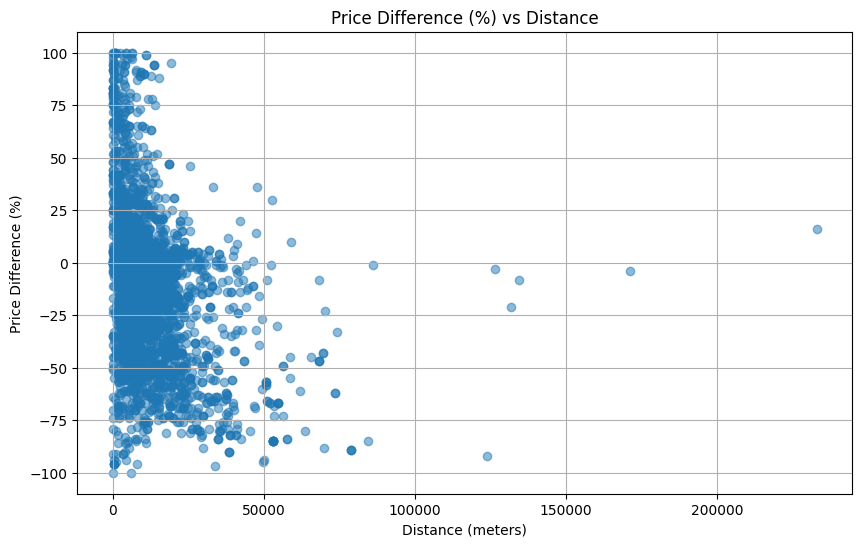

In [11]:
# Plotting a scatter plot of price difference vs. distance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['distance'], cleaned_df['price_diff_%'], alpha=0.5)
plt.title('Price Difference (%) vs Distance')
plt.xlabel('Distance (meters)')
plt.ylabel('Price Difference (%)')
plt.grid(True)
plt.show()


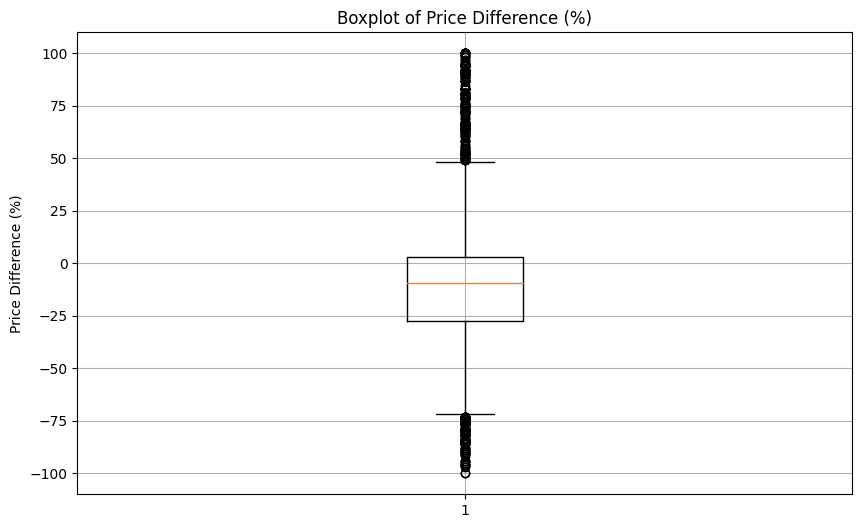

In [12]:
# Creating a box plot for price difference to spot outliers
plt.figure(figsize=(10, 6))
plt.boxplot(cleaned_df['price_diff_%'])
plt.title('Boxplot of Price Difference (%)')
plt.ylabel('Price Difference (%)')
plt.grid(True)
plt.show()

In [13]:
cleaned_df = df[(df['price_diff_%'] >= -100) & (df['price_diff_%'] <= 100)]
cleaned_df = cleaned_df[cleaned_df['distance'] > 0]
cleaned_df = cleaned_df.dropna(subset=['metered_price', 'upfront_price', 'price_diff_%', 'distance', 'duration'])

In [17]:
# Creating a box plot to show the impact of GPS confidence on price difference
plt.figure(figsize=(10, 6))



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

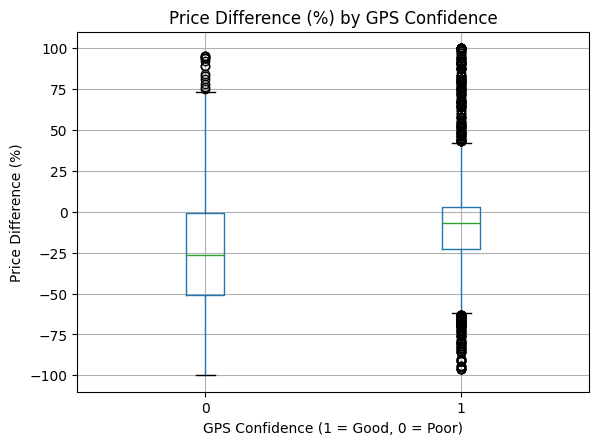

In [18]:
# Creating boxplots for price difference grouped by gps_confidence
cleaned_df['gps_confidence'] = cleaned_df['gps_confidence'].astype(int)  # Convert to int for better readability in plots
cleaned_df.boxplot(column='price_diff_%', by='gps_confidence', grid=True)

plt.title('Price Difference (%) by GPS Confidence')
plt.suptitle('')  # Remove automatic title to make it cleaner
plt.xlabel('GPS Confidence (1 = Good, 0 = Poor)')
plt.ylabel('Price Difference (%)')
plt.grid(True)
plt.show()

**GPS Confidence** = 1 (Good GPS): The majority of rides with good GPS have a tighter distribution of price differences. This suggests more accurate upfront pricing.

**GPS Confidence** = 0 (Poor GPS): Rides with poor GPS confidence tend to show more variability in price discrepancies, indicating that unreliable GPS signals can contribute to larger pricing errors.
